In [27]:
import sys
# sys.path
# sys.path[5] = "C:\\ProgramData\\Anaconda3\\envs\\geoplot\\Lib\\site-packages"

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from osgeo import gdal
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import copy
# import rasterio
#PlateCarree EqualEarth()

In [28]:
def get_geotiff_data(path):
    """
    get gdal raster data
    """
    ds = gdal.Open(path)
    gt = ds.GetGeoTransform()
    array = ds.ReadAsArray()
    
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    
    xres, yres = gt[1], gt[5]
    xcor, ycor = gt[0], gt[3]
    
    lat = np.arange(ycor, ycor + yres*ysize, yres)
    lon = np.arange(xcor, xcor + xres*xsize, xres)
    return lon, lat, array

In [29]:
def draw(ax1, title, lon, lat, array, vmin, vmax, levels, cmap, number):
    ax1.outline_patch.set_linewidth(0.3)
    #Setting colour properties
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    array[array==-9999] = np.nan
    
    # ax1.add_feature(cfeature.LAND, color="gray")
        
    cs = ax1.pcolormesh(lon, lat, array, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax)
    # cbar = fig.colorbar(cs, orientation='horizontal', pad=0.09, shrink=1, fraction=0.03, aspect=50)
    # # ax1.set_title(title, fontsize='medium')
    # #Modify the length of the scale
    # cbar.ax.tick_params(size=1)
    # cbar.outline.set_linewidth(0.2)
    ax1.add_feature(cfeature.BORDERS, linewidth=0.15)
    ax1.set_global()
    ax1.coastlines(linewidth=0.2)
    a = ax1.gridlines(draw_labels=True, linewidth=0.2)
    a.top_labels = False
    ax1.text(
        0.65, 0.1, title,
        fontsize=10,
        style="italic",
        transform = ax1.transAxes
    )
    ax1.text(
        -0.03, 0.95, number,
        fontsize=8,
        transform = ax1.transAxes
    )

In [30]:
def draw_hist(ax, array, bins, ran, cmap):
    input_array = array.reshape(-1)
    input_array = input_array[input_array!=-9999]

    input_array[input_array<0] = 0
    input_array[input_array>1] = 1
    N, bins, patches = ax.hist(input_array, bins=bins, range=ran, edgecolor='black', density=True, linewidth=0.2)
    
    ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([]) 
    
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1], ["100%", "population", "Equal", "Probability", "100%"], rotation=90, fontsize=4)
    ax.set_facecolor("none")
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    # ax.spines['left'].set_visible(False)
    ax.spines["bottom"].set_linewidth("0.5")
    ax.spines["left"].set_linewidth("0.5")
    ax.margins(0, 0)
    ax.tick_params("x",which="major",
               length=2,width = 0.2,
               colors = "0.25")

    
    
    ax.tick_params("y",which="major",
               length=2,width = 0.2,
               colors = "0.25")
    
    formatter = ticker.FormatStrFormatter("%1.1f")
    ax.yaxis.set_major_formatter(formatter)
    
    cm = plt.get_cmap(cmap)
    for i in range(len(patches)):
        color = cm(1.*i/len(patches))  
        patches[i].set_facecolor(color)

In [31]:
# input_folder = "E:\\weather extreme\\pr_record_breaking_proba_uncertain\\V2\\"
output_folder = "G:\\weather extreme\\mapping_result\\"

C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_28884\3851534502.py:2: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linewidth(0.3)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_28884\3851534502.py:2: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linewidth(0.3)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_28884\3851534502.py:2: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linewidth(0.3)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_28884\3851534502.py:2: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linewidth(0.3)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_28884

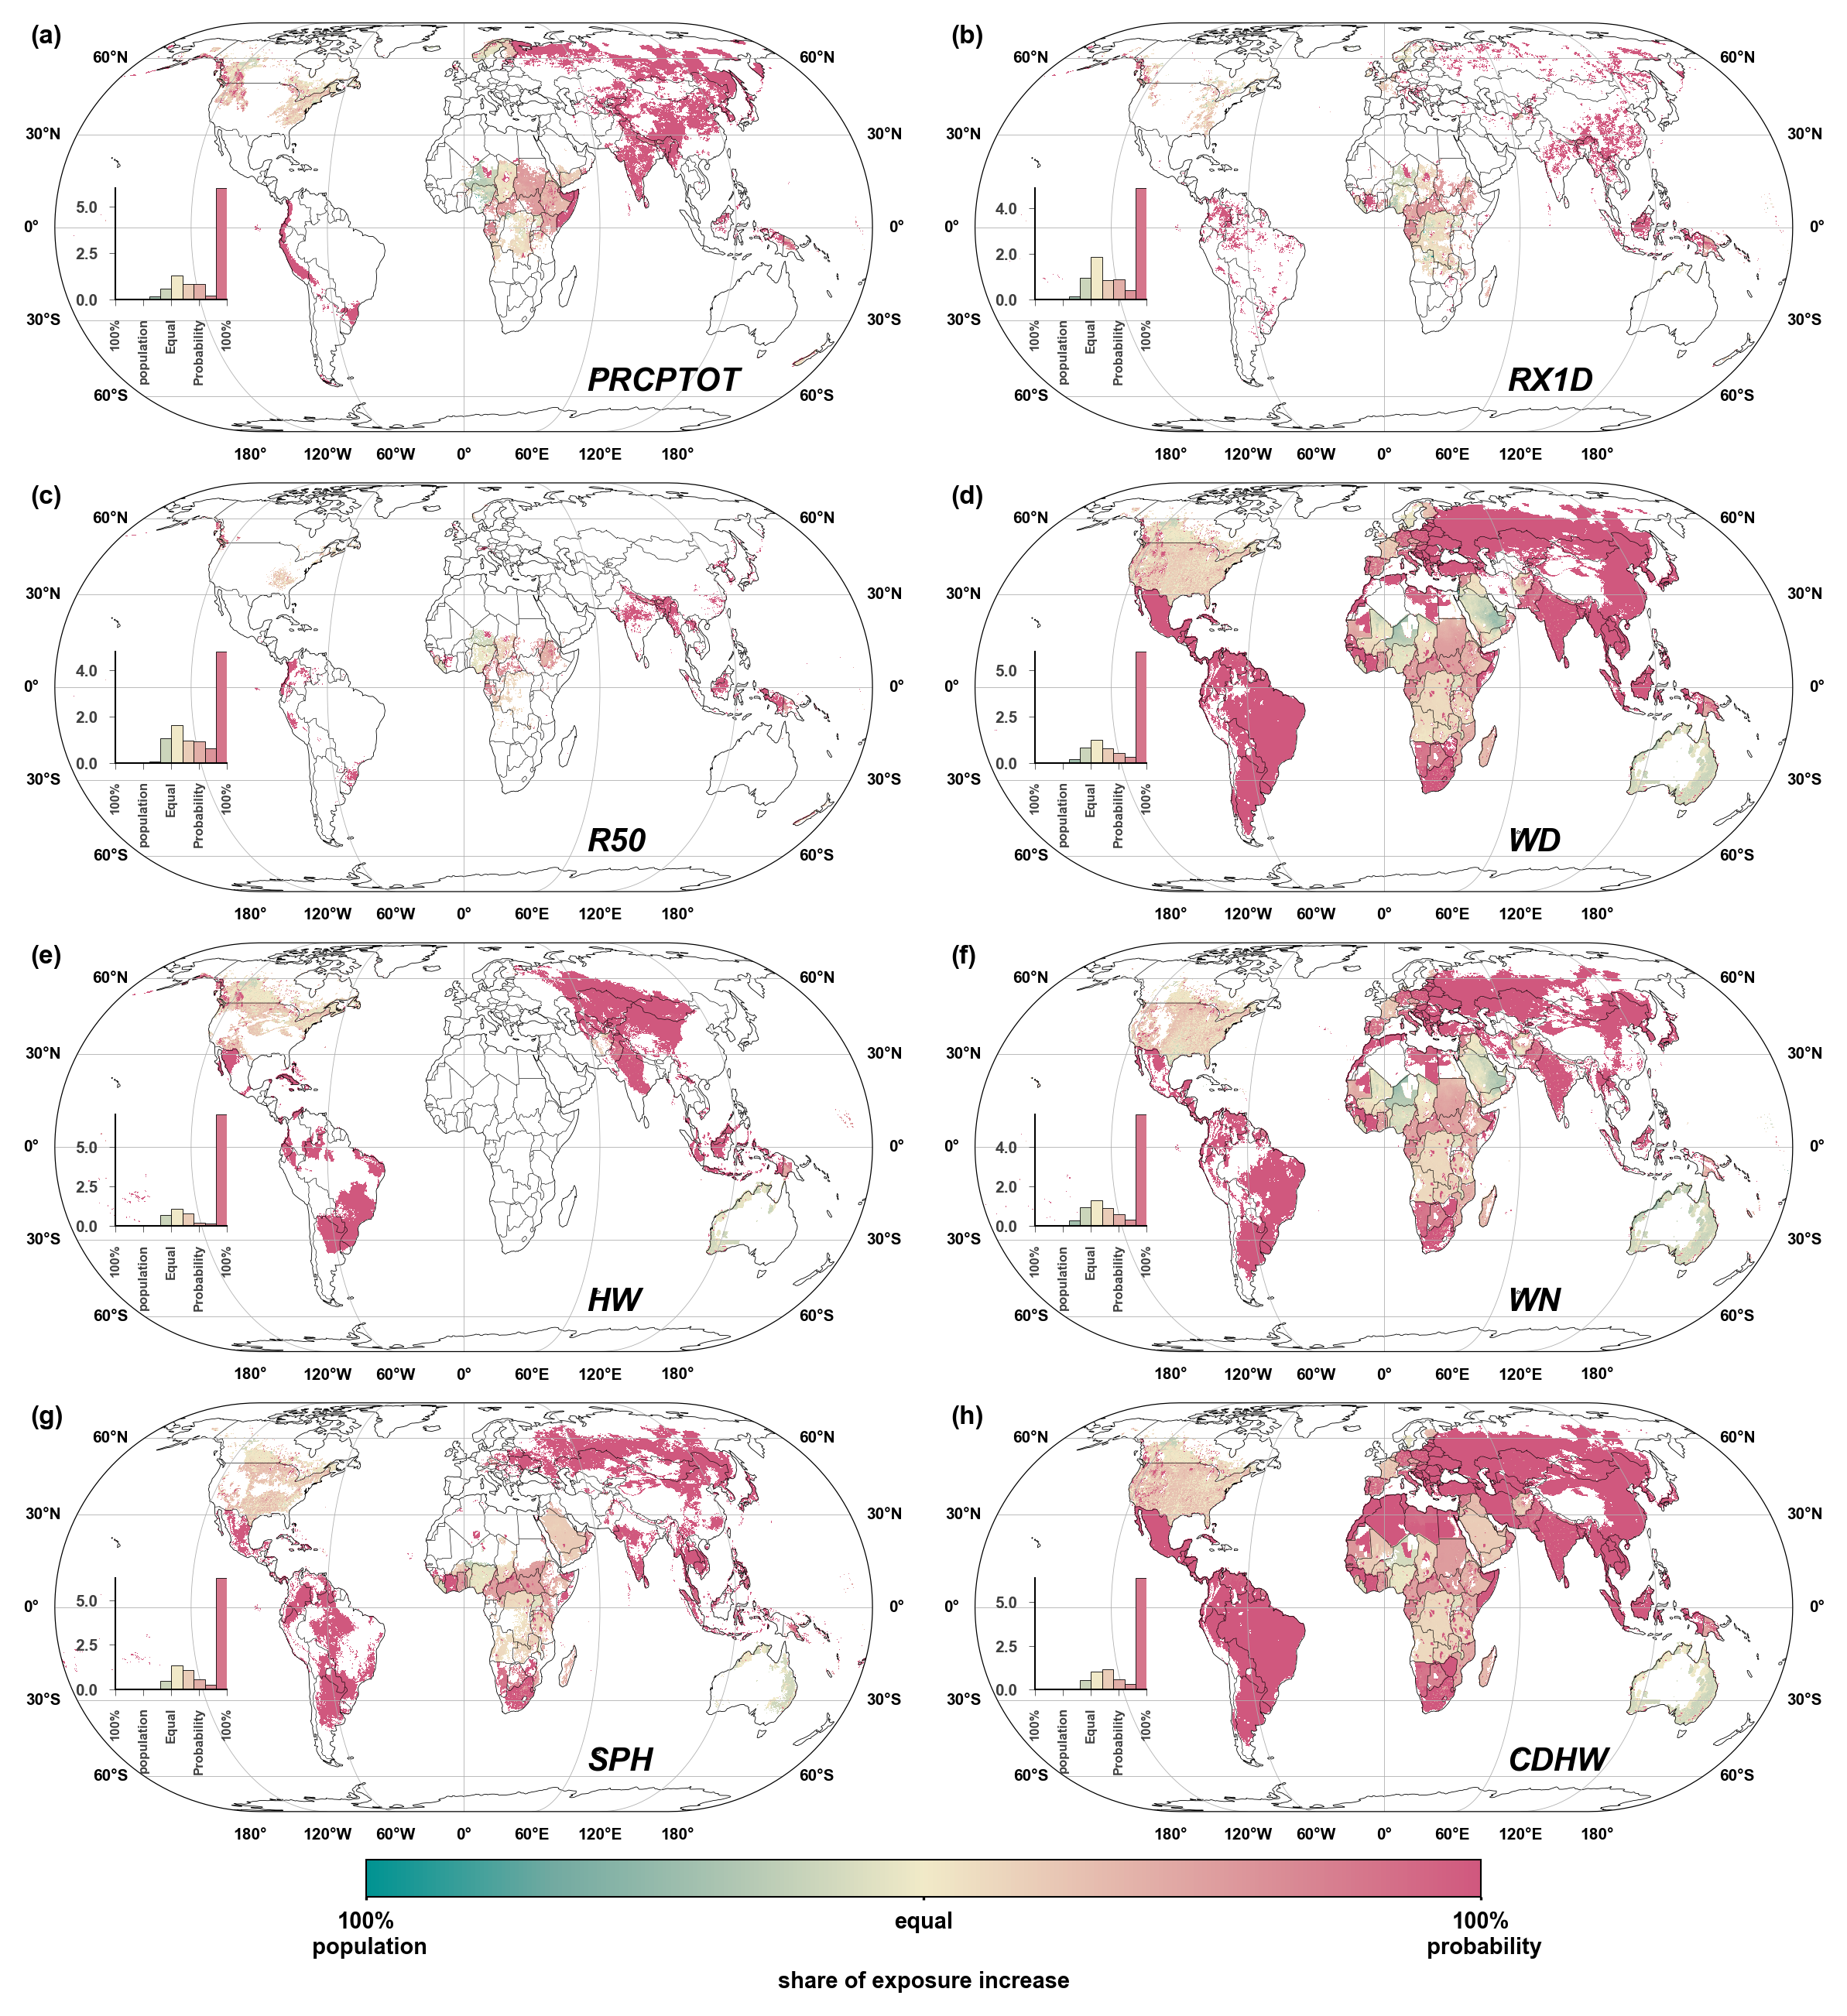

In [32]:
#precipitation CM YlGnBu
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
fig = plt.figure(figsize=(8,8), dpi=300)

clist = ["#008080","#70a494","#b4c8a8","#f6edbd","#edbb8a","#de8a5a","#ca562c"]
clist = ["#009392","#72aaa1","#b1c7b3","#f1eac8","#e5b9ad","#d98994","#d0587e"]
newcmap = LinearSegmentedColormap.from_list('chaos',clist)

plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":5})
projection = ccrs.EckertIV()

ax1 = fig.add_subplot(4, 2, 1,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\trend\slope\PRCPTOT_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\trend\significance\PRCPTOT_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\PRCPTOT_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_prob_trend\slope\PRCPTOT_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax1, 'PRCPTOT', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 2200, 200), cmap=newcmap, number="(a)")
ax111 = plt.axes([0.065, 0.84, 0.06, 0.06])
draw_hist(ax111, array, 10, (0, 1), newcmap)

# draw_area_plot(ax11, np.arange(0, 2200, 200), array, 'RdYlBu_r')
# ax11 = plt.axes([0.48, 0.82, 0.07, 0.170])

# draw_proportion_chart(ax111, array, np.arange(0, 2200, 200), 'RdYlBu_r')

ax2 = fig.add_subplot(4, 2, 2,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\trend\slope\RX1D_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\trend\significance\RX1D_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\RX1D_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_prob_trend\slope\RX1D_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax2, 'RX1D', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 2200, 200), cmap=newcmap, number="(b)")

ax222 = plt.axes([0.56, 0.84, 0.06, 0.06])
draw_hist(ax222, array, 10, (0, 1), newcmap)

# ax12 = plt.axes([0.948, 0.82, 0.07, 0.170])
# draw_area_plot(ax12, np.arange(0, 2200, 200), array, 'RdYlBu_r')

# ax122 = plt.axes([0.596, 0.82, 0.06, 0.06])
# draw_proportion_chart(ax122, array, np.arange(0, 2200, 200), 'RdYlBu_r')

ax3 = fig.add_subplot(4, 2, 3,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\trend\slope\R50_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\trend\significance\R50_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\R50_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_prob_trend\slope\R50_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax3, 'R50', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 1100, 100), cmap=newcmap, number="(c)")

ax333 = plt.axes([0.065, 0.5906, 0.06, 0.06])
draw_hist(ax333, array, 10, (0, 1), newcmap)

# ax33 = plt.axes([0.48, 0.5706, 0.07, 0.170])
# draw_area_plot(ax33, np.arange(0, 1100, 100), array, 'RdYlBu_r')

# ax333 = plt.axes([0.128, 0.5706, 0.06, 0.06])
# draw_proportion_chart(ax333, array, np.arange(0, 1100, 100), 'RdYlBu_r')

ax4 = fig.add_subplot(4, 2, 4,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\Revision\heat(tasmax)\exposure_trend\slope\WD_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\Revision\heat(tasmax)\exposure_trend\significance\WD_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\WD_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\Revision\heat(tasmax)\share_of_prob_trend\slope\WD_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax4, 'WD', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 77000, 7000), cmap=newcmap, number="(d)")

ax444 = plt.axes([0.56, 0.5906, 0.06, 0.06])
draw_hist(ax444, array, 10, (0, 1), newcmap)

# ax44 = plt.axes([0.948, 0.5706, 0.07, 0.170])
# draw_area_plot(ax44, np.arange(0, 77000, 7000), array, 'RdYlBu_r')

# ax444 = plt.axes([0.596, 0.5706, 0.06, 0.06])
# draw_proportion_chart(ax444, array, np.arange(0, 77000, 7000), 'RdYlBu_r')

ax5 = fig.add_subplot(4, 2, 5,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\Revision\heatwave\HW_exposure_trend\slope\HW_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\Revision\heatwave\HW_exposure_trend\significance\HW_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\HeatWave_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\Revision\heatwave\HW_share_of_prob_trend\slope\HW_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax5, 'HW', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 11000, 1000), cmap=newcmap, number="(e)")
ax555 = plt.axes([0.065, 0.3412, 0.06, 0.06])
draw_hist(ax555, array, 10, (0, 1), newcmap)

# ax55 = plt.axes([0.48, 0.3212, 0.07, 0.170])
# draw_area_plot(ax55, np.arange(0, 11000, 1000), array, 'RdYlBu_r')

# ax555 = plt.axes([0.128, 0.3212, 0.06, 0.06])
# draw_proportion_chart(ax555, array, np.arange(0, 11000, 1000), 'RdYlBu_r')

ax6 = fig.add_subplot(4, 2, 6,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\Revision\warmnight(tasmin)\WN_exposure_trend\slope\WN_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\Revision\warmnight(tasmin)\WN_exposure_trend\significance\WN_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\WN_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\Revision\warmnight(tasmin)\WN_share_of_prob_trend\slope\WN_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax6, 'WN', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 33000, 3000), cmap=newcmap, number="(f)")

ax666 = plt.axes([0.56, 0.3412, 0.06, 0.06])
draw_hist(ax666, array, 10, (0, 1), newcmap)

# ax66 = plt.axes([0.948, 0.3212, 0.07, 0.170])
# draw_area_plot(ax66, np.arange(0, 33000, 3000), array, 'RdYlBu_r')

# ax666 = plt.axes([0.596, 0.3212, 0.06, 0.06])
# draw_proportion_chart(ax666, array, np.arange(0, 33000, 3000), 'RdYlBu_r')

ax7 = fig.add_subplot(4, 2, 7,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\Revision\SPH\SPH_exposure_trend\slope\SPH_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\Revision\SPH\SPH_exposure_trend\\significance\SPH_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\SPH_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\Revision\SPH\SPH_share_of_prob_trend\slope\SPH_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob
draw(ax7, 'SPH', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 5500, 500), cmap=newcmap, number="(g)")

ax777 = plt.axes([0.065, 0.0918, 0.06, 0.06])
draw_hist(ax777, array, 10, (0, 1), newcmap)

# ax77 = plt.axes([0.48, 0.0718, 0.07, 0.170])
# draw_area_plot(ax77, np.arange(0, 5500, 500), array, 'RdYlBu_r')

# ax777 = plt.axes([0.128, 0.0718, 0.06, 0.06])
# draw_proportion_chart(ax777, array, np.arange(0, 5500, 500), 'RdYlBu_r')

ax8 = fig.add_subplot(4, 2, 8,
                      projection=projection)
lon, lat, array = get_geotiff_data(r"G:\weather extreme\Revision\CDHW\CDHW_exposure_trend\slope\CDHW_ssp585_median_slope.tif")
lon, lat, sig_array = get_geotiff_data(r"G:\weather extreme\Revision\CDHW\CDHW_exposure_trend\significance\CDHW_ssp585_median_pvalue.tif")
array[sig_array>0.05] = -9999
array[array<=0] = -9999
array[np.isnan(sig_array)] = -9999
# lon, lat, pop = get_geotiff_data(r"G:\weather extreme\mapping_data\exposure_span10\share_trend\share_of_pop_trend\slope\CHDW_ssp585_median_slope.tif")
lon, lat, prob = get_geotiff_data(r"G:\weather extreme\Revision\CDHW\CDHW_share_of_prob_trend\slope\CDHW_ssp585_median_slope.tif")
share_of_prob = prob/array
share_of_prob[share_of_prob < 0] = 0
share_of_prob[share_of_prob > 1] = 1
share_of_prob[array==-9999] = -9999
array = share_of_prob

draw(ax8, 'CDHW', lon, lat, array, vmin=0, vmax=1, levels=np.arange(0, 22000, 2000), cmap=newcmap, number="(h)")

ax888 = plt.axes([0.56, 0.0918, 0.06, 0.06])
draw_hist(ax888, array, 10, (0, 1), newcmap)



# ax88 = plt.axes([0.948, 0.0718, 0.07, 0.170])
# draw_area_plot(ax88, np.arange(0, 22000, 2000), array, 'RdYlBu_r')

# ax888 = plt.axes([0.596, 0.0718, 0.06, 0.06])
# draw_proportion_chart(ax888, array, np.arange(0, 22000, 2000), 'RdYlBu_r')

plt.tight_layout()



ax999 = plt.axes([0.2, -0.02, 0.6, 0.02])

cmap1 = copy.copy(cm.BrBG)
norm1 = mcolors.Normalize(vmin=0, vmax=1)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm1, cmap=newcmap), cax=ax999, orientation="horizontal", ticks=[0, 0.5, 1])
cbar.ax.set_xticklabels(['100%\n population', 'equal', '100%\n probability'], fontsize=7)
cbar.ax.tick_params(size=1)
cbar.outline.set_linewidth(0.5)
cbar.set_label(label="share of exposure increase", loc="center", fontsize=7)
# # 第一个colorbar使用线性的Normalize.
# cmap1 = copy.copy(cm.BrBG)
# norm1 = mcolors.Normalize(vmin=0, vmax=1)
# im1 = cm.ScalarMappable(norm=norm1, cmap=cmap1)
# cbar1 = ax999.colorbar(
#     im1, cax=axes, orientation='horizontal',
#     ticks=np.arange(0, 1, 0.1),
# )



#  xticks = [-180, -120, -60, 0, 60, 120, 180]
# ax.set_xticks(xticks, crs=proj)
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
# lon_formatter = mticker.LongitudeFormatter(zero_direction_label=True)
# lat_formatter = mticker.LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)

plt.savefig(output_folder + "trend_share_ssp585_median_revised.jpg", dpi=1000, bbox_inches="tight")
plt.show()